### Defining the libraries, functions and the measured data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import signal
from scipy.stats import linregress
import math
import random
from sklearn.metrics import r2_score
from scipy.interpolate import UnivariateSpline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Run1 (Alumina, Detailed  ACoff s2i8 MRI FOV, XL ROI, Measured and Dimension Volume normalised) 
tpet1=np.array([ 245,  492,  496,  500,  504,  508,  512,  516,  520,  524,  528,  532,536,  540,  544,  548,  552,  556,  560,  564,  568,  575,  585,  595,660,  780,  900, 1020, 1140, 1260, 1380, 1500, 1620, 1740, 1860, 1980,2100, 2220, 2340, 2460, 2580, 2700, 2820, 2940])
bins1=np.array([[490,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,4,   4,   4 , 10,  10,  10, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120]]) 

    #Min Fov (Same ROI between Min and Full, Used in paper)
Cpetin1=np.array([0.047218046,0.512057663,0.98707518,1.811909132,2.824704828,3.92082848,5.275020579,6.892198709,8.404694301,10.20229691,11.90555892,13.16595276,15.17507965,16.71907706,18.32169498,19.55679061,21.16417214,20.72860706,20.28715474,20.18256256,19.73476694,19.10288388,18.70412425,18.19149611,16.09808828,13.57573021,11.38552197,9.342966159,7.766772286,6.302102225,4.97906525,3.998837235,3.009153253,2.249706827,1.721287354,1.292616064,1.002162272,0.802935646,0.664779147,0.569560517,0.506774267,0.473632337,0.446820708,0.421168383]) #Shifted MRI FOV, exactly the same ROIs as Full FOV
Cpetout1=np.array([0.033561877,0.039369616,0.051241413,0.044551179,0.060235631,0.043371754,0.042839094,0.051101078,0.047556753,0.051563109,0.051861356,0.062798827,0.09544991,0.141096344,0.224766237,0.358103853,0.54789642,0.787595671,1.01735247,1.324040465,1.581536764,2.056762747,2.644629674,3.072978467,5.124224811,7.750353531,9.966815684,11.52163504,13.65668504,14.8245224,15.27169602,16.8533421,18.04943663,18.81361808,19.19018551,19.74934171,19.54248648,19.49521116,20.09077467,20.47274922,20.09356732,20.19467181,20.22272693,20.08917787]) #Shifted MRI FOV, exactly the same ROIs as Full FOV
Cpetref1=np.array([44.38168763,45.32449506,44.13006128,45.22741347,45.63973435,44.24916266,45.06870482,45.88748106,44.45558593,45.11344896,45.08310303,43.972143,44.91626229,45.24588523,45.68257819,44.38384188,45.03292154,44.70453732,44.33250435,45.17005295,45.66033149,44.75372788,44.64690264,44.48265806,45.30033156,44.41019884,44.42070055,44.60094918,44.77397938,44.88554557,44.94671014,44.598405,45.0773195,44.31062653,44.36772932,44.3258249,44.01967603,44.56044617,44.63871773,44.32533901,44.30761341,44.16585913,44.08317086,44.65315792])   #Shifted MRI FOV, exactly the same ROIs as Full FOV
    #Max FoV (Same ROI between Min and Full)
Cpetin1f=np.array([0.043681453,0.463892691,0.958810773,1.81541654,2.834642516,3.901043621,5.242139693,6.879105858,8.070450431,10.20462715,11.57518442,13.03664246,14.94452289,16.54935853,18.30152877,19.30916866,20.45305016,21.02713581,19.94385195,20.53292152,19.76343651,19.20471926,18.65887762,18.37082529,16.36550855,13.56923532,11.29421575,9.386906213,7.827236679,6.393852402,5.127428324,4.035978113,3.033273319,2.31042437,1.706675585,1.315230062,0.996447306,0.815045724,0.669728632,0.57491916,0.52399249,0.488614291,0.456766234,0.424902101])  # Same ROIs as MRI FOV
Cpetout1f=np.array([0.030216135,0.026019881,0.033710165,0.027164556,0.035012543,0.030369063,0.024035147,0.02769984,0.029733107,0.033144445,0.035247224,0.047449443,0.070973388,0.11780607,0.185856729,0.298041876,0.50383406,0.741461329,0.986533832,1.334469974,1.608685291,2.082198058,2.652843992,2.962232522,4.966728341,7.499994439,9.457547885,10.88423875,12.1909008,13.37838418,14.43892359,15.28588718,15.8803729,16.71366294,16.76355006,17.06597258,17.43268627,17.68518922,17.60258156,17.87024976,17.6321762,17.5078325,17.989031,17.89922501])     # Same ROIs as MRI FOV
Cpetref1f=np.array([41.20053512,41.48270118,40.76785997,41.90013183,42.02521725,41.22067106,42.64236247,43.38288349,42.1023952,43.66904718,43.49546568,42.82485086,44.03371416,44.2948233,44.08383019,43.42467891,44.39821297,44.38971997,43.63149556,44.33855889,44.25960909,44.19404124,44.54855705,43.95110124,44.125019,44.32458436,44.3957305,44.195457,44.29563475,44.03318262,44.55255147,44.32248926,44.39417511,44.68511872,44.49440198,44.64710069,43.89847883,44.4518845,44.20804527,43.80359357,44.09711775,43.69960211,43.78583384,43.88024089])   # Same ROIs as MRI FOV

    #Similar but not the same ROI on same reconstructions
Cpetin1og=np.array([0.025531061,0.437005311,0.906941415,1.668107187,2.570726425,3.817742662,4.975092217,6.439625301,7.990900939,9.836056119,11.43995397,12.80189524,14.82811607,16.1501444,17.47702065,19.1104178,20.64848218,20.08420698,19.44965428,19.71403987,19.57857907,19.03176807,18.2936729,17.88317393,15.99097911,13.32641363,10.80970286,9.019049934,7.729850827,6.180096883,4.981821376,3.929319421,2.961530302,2.238190202,1.652826172,1.264029371,0.96475784,0.75811971,0.624997518,0.544576075,0.478206667,0.446221652,0.407770252,0.39482617])  #not shifted FOV (simply the MRI) and also not the same ROIs as  Full FOV
Cpetout1og=np.array([0.019533682,0.02126664,0.027363072,0.021990021,0.036242315,0.021773379,0.018932732,0.029039449,0.028097123,0.029369598,0.0298857,0.036098324,0.070139595,0.12183957,0.183131841,0.329415891,0.529659429,0.743694789,0.976614849,1.272040258,1.521347076,1.981932782,2.574525712,2.963321873,4.879765587,7.435940551,9.521539203,11.6400819,13.06234143,14.51814978,15.71500904,17.02509203,17.51462241,18.61211188,18.71536212,19.12319401,19.6864461,19.81799469,19.57552456,20.0582154,20.05437215,20.55820599,20.68571554,19.73260742])  #not shifted FOV (simply the MRI) and also not the same ROIs as  Full FOV
Cpetref1og=np.array([42.99936593,42.96265275,42.56714869,43.13630003,43.11144586,42.41208169,42.99464746,43.47083537,42.39139863,43.16974503,44.03103139,42.16742575,42.75716786,43.64115116,43.42828074,42.19532797,43.04830831,43.18640928,42.63262002,42.87399602,43.15423526,42.56406757,42.82226493,42.8312457,42.68108912,42.34912834,42.75240535,42.18861997,43.07704163,42.61847517,42.26252111,42.67526632,42.47128118,43.03718192,42.76132716,42.41806058,42.52095314,42.30563421,42.8662703,42.435652,42.33603683,42.37504639,42.34777766,42.51329867]) #not shifted FOV (simply the MRI) and also not the same ROIs as  Full FOV
Cpetin1fog=np.array([0.043704261,0.463987506,0.966579081,1.82404468,2.839986169,3.916144997,5.273339409,6.902694104,8.098204232,10.21810143,11.59741985,13.05801409,14.97708175,16.58168938,18.30867156,19.31360832,20.45003218,20.99954816,19.91123611,20.51018601,19.71989891,19.18142419,18.63002565,18.34659513,16.34677567,13.54983622,11.27749363,9.373742833,7.813343396,6.381266609,5.117484462,4.02663464,3.026548115,2.303857505,1.700109466,1.310013173,0.994363367,0.812629674,0.666929262,0.571631023,0.522077932,0.485241803,0.454635217,0.423056876])
Cpetout1fog=np.array([0.028781732,0.024055356,0.032991857,0.02459954,0.03383672,0.027056438,0.025212658,0.031401908,0.030629339,0.0320034,0.032253136,0.045252809,0.066308078,0.114369091,0.178344884,0.285180313,0.49287832,0.722592249,0.966929882,1.315308336,1.587999507,2.053511113,2.62550627,2.935098061,4.939050826,7.457952318,9.406573977,10.82668023,12.12669395,13.30955526,14.36933353,15.21422197,15.80491105,16.63518207,16.67573899,16.9821927,17.35603695,17.6017326,17.51875903,17.78463512,17.546111,17.42739462,17.91221338,17.8215448])
Cpetref1fog=np.array([40.63455169,40.88797138,40.18865935,41.276635,41.3951264,40.61717956,42.01966203,42.73625166,41.50318551,43.04009702,42.91041211,42.21520119,43.40544493,43.66724809,43.45109438,42.79319359,43.75522209,43.77410573,42.99517423,43.69838835,43.63843414,43.55328115,43.94718826,43.32342324,43.50943894,43.70328534,43.78998703,43.59355845,43.67350238,43.41461717,43.91204286,43.68386996,43.75987944,44.04471397,43.87304841,44.01937655,43.2718082,43.83662575,43.58652268,43.17865981,43.48506394,43.09390819,43.18058457,43.25856456])
    #XXXL ROIs on same reconstructions
Cpetin1fXXXL=np.array([2.099115703,3.84535532,4.430175976,5.654159015,6.947634307,8.37581683,10.04594982,12.11188457,13.53203351,16.06497954,17.76754357,19.24018542,21.69553214,23.45441178,25.46425931,26.79308185,27.7091982,27.85498158,26.63103458,27.33134255,26.51721162,25.12851166,24.37583492,24.00540919,21.05564649,17.89451713,15.30669005,13.08662012,11.29289116,9.646867568,8.206267415,6.919426465,5.825605706,4.975922776,4.340207299,3.876836958,3.50392995,3.320425399,3.179153298,3.034076487,3.021107111,2.952093494,2.895216298,2.856969471])
Cpetout1fXXXL=np.array([1.734387307,2.598002812,2.577873102,2.628560388,2.742294349,2.703795564,2.805219411,2.9160543,2.771755918,2.917422613,2.894415507,2.998995824,3.076988381,3.158944041,3.312686224,3.426935859,3.734521859,3.961140505,4.171400588,4.539538285,5.009080552,4.847542463,5.447340597,5.824352604,7.548628689,10.40734466,12.62466279,14.27051625,15.76673222,17.13131117,18.38067854,19.3496854,20.01301148,20.99806164,21.07874014,21.42033999,21.80600346,22.07984646,22.00815894,22.30154566,22.02910174,21.90788266,22.40990138,22.32734369])
Cpetref1fXXXL=np.array([42.04081216,42.33793193,41.61687495,42.76108664,42.90916465,42.07566684,43.51344512,44.31526688,42.96635856,44.5991393,44.43450449,43.7516047,44.96206628,45.27204153,45.00248364,44.40234378,45.389599,45.37936935,44.58557746,45.3297157,45.23707882,45.20686566,45.53152727,44.92176854,45.07467285,45.29132467,45.34713445,45.13087499,45.25695695,44.98626998,45.50959615,45.27296376,45.35522776,45.64457571,45.4614398,45.60514535,44.83644526,45.39959432,45.16363256,44.75244466,45.0433903,44.62855382,44.70527046,44.81866846]) 

q1=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref1=57.4404377216671
#length=[490,4,10,120]
#elements=[1,20,3,20]

#Run2 (Alumina, Detailed ACoff s2i8 MRI FOV, XL ROI, Measured and Dimension Volume normalised)
tpet2=np.array([240, 482, 486, 490, 494, 498, 502, 506, 510, 514, 518, 522, 526, 530, 534, 538, 542, 546, 550, 554, 558, 565, 575, 585, 595, 660, 780, 900, 1020, 1140, 1260, 1380, 1500, 1620, 1740, 1860, 1980, 2100, 2220, 2340, 2460, 2580, 2700, 2820, 2940])
bins2=np.array([480, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])


    #Min FoV (Different ROI, used in paper)
Cpetin2og=np.array([3.116270583,2.598721783,3.068776966,4.081879283,5.514788397,6.928925494,8.949310904,10.95623024,12.97411109,15.04420168,17.5171145,18.38592545,17.7628351,17.73400484,17.61667491,17.0341531,16.65879546,16.22197933,15.1881277,15.34485263,14.92606359,13.83651094,13.38221364,12.48666355,12.24038224,9.945508938,6.718624422,4.841583243,3.217753275,2.28124944,1.512554069,0.981633996,0.660576837,0.399117151,0.267698752,0.186261264,0.145461584,0.126492419,0.112722485,0.107640104,0.105589449,0.095485015,0.09322037,0.092713952,0.087478662])
Cpetout2og=np.array([14.32743834,15.80580578,15.64761735,15.94303525,15.87115308,16.06228483,16.18563994,16.37327416,16.31386305,16.74082381,16.63217067,16.99145566,16.56781036,17.2067618,17.89693369,17.29909667,18.40768735,18.78250819,18.96616403,19.63316994,20.22223425,20.97304442,21.38328409,22.01534248,22.80952964,25.178126,28.76796148,30.57055515,31.92701307,33.1889723,33.69811782,34.28483719,34.73108853,34.82015202,34.71564834,34.4667998,34.78494423,34.60856738,35.50685241,35.16263258,35.83169908,34.78166649,35.12515667,34.84368968,34.87071484])
Cpetref2og=np.array([30.99308906,31.43951064,31.06046433,31.56849902,31.84186589,31.16392796,31.59981221,31.46327875,31.55863081,30.74255729,31.5680409,31.25057268,30.79469305,31.61606935,31.61240378,30.84566612,31.50691453,31.42684268,30.78692843,31.40055659,31.17533537,30.93698289,31.28732635,31.21829992,31.3650282,30.73052147,30.9981077,31.22492462,30.86622598,31.32825389,31.13012388,31.04233869,31.77220973,30.93806926,30.87904568,30.90646615,31.09662458,31.02615406,30.93002496,31.04534802,31.60733592,31.2435184,31.02471425,30.56573747,31.1616277])
    #Max FoV (Different ROI, used in paper)
Cpetin2fog=np.array([3.29143367,2.800859533,3.384872093,4.493529625,5.852789269,7.493342314,9.494984883,11.529132,13.73623068,15.49896058,17.9867774,18.80828446,18.29998738,18.54767264,18.05547155,17.40810729,17.18933767,16.77671184,16.16274766,15.62467509,15.27154205,14.58072444,13.94801214,13.05281535,12.89585512,9.975320201,6.999051442,4.849250729,3.404976649,2.399996568,1.607190673,1.056375969,0.720365596,0.484583669,0.325472256,0.244539768,0.199481335,0.178537997,0.163238538,0.156503851,0.152487801,0.145153591,0.139400058,0.141418131,0.133550482])
Cpetout2fog=np.array([12.97207458,14.07606318,13.87005729,14.17458699,14.23026395,14.2850591,14.58708247,14.8208846,15.04486005,14.87654595,15.34918712,15.67084224,15.29406509,16.13977808,15.96817877,16.09410205,16.52404417,17.35727665,17.06838764,17.87148923,18.30813567,18.73312267,19.13954567,19.741288,20.14052508,21.90176569,24.31257024,25.33697457,26.3229843,27.07915979,27.48611652,27.91861315,28.33676801,28.71190856,28.32937406,28.33756328,28.32786139,28.29822896,28.31656483,28.48660261,28.59133441,28.64784348,28.62800839,28.41302014,28.72017914])
Cpetref2fog=np.array([31.66471807,32.25149697,31.4488121,31.92587831,31.97387137,31.23831804,31.99339571,32.3140698,31.93561209,31.78358918,31.90148003,32.19709823,31.47610735,32.34623376,32.42916397,31.58579715,31.96414437,32.16252203,31.3544875,32.1575272,32.05031745,31.8074801,31.53979878,31.90530154,31.90865943,31.42024752,31.38816802,31.42973429,31.47535821,31.66273179,31.82227393,31.82841256,31.92057591,31.92444151,31.5558744,31.57362996,31.83258454,31.73802109,31.4758348,31.44178198,31.60106407,31.7147675,31.42551875,31.71990668,31.5222628])   #With measured volume measure the volume for this (need to determine the volume of the ref vial for this)

    #Same ROI between Min and Full
Cpetin2=np.array([3.27600541,2.791835831,3.335259431,4.405138759,5.908866494,7.400370148,9.503299682,11.58891455,13.72096397,15.80701893,18.39205949,19.24321473,18.49470192,18.47988459,18.31290897,17.74485634,17.35079567,16.96468034,15.87151488,16.01793173,15.60153426,14.44480419,13.95075828,13.02693499,12.75518296,10.33986095,6.979871479,5.044945058,3.374063627,2.401949769,1.605245764,1.055007261,0.725295073,0.454409319,0.317893072,0.232062836,0.191634004,0.16926244,0.154063153,0.148558646,0.149258653,0.136939725,0.132913548,0.132845473,0.12651726])
Cpetout2=np.array([15.00334675,16.56865055,16.41432941,16.71957717,16.66211301,16.85616765,17.06784072,17.19090408,17.1316923,17.54794085,17.48040839,17.83817515,17.39000565,18.07687353,18.79816255,18.11812168,19.40622505,19.7486377,19.98890057,20.66453056,21.29733503,22.04857531,22.47398997,23.15388124,23.96367269,26.42730533,30.16478575,32.0319626,33.50123036,34.76943489,35.33966704,35.92344707,36.3857884,36.46083164,36.38012621,36.15639307,36.4393014,36.26556706,37.19764655,36.82984815,37.5400521,36.45875095,36.7747782,36.44247137,36.51914676])
Cpetref2=np.array([32.31775213,32.83055653,32.44660054,32.98047185,33.2437545,32.58386669,32.99715267,32.87096582,33.022206,32.10944547,33.0057853,32.68415117,32.20633487,33.10752892,33.14904521,32.30036375,32.97042075,32.91306393,32.24937698,32.84113819,32.61909218,32.37042812,32.77111746,32.69138888,32.82572712,32.12885432,32.38929835,32.57091461,32.27950968,32.75300508,32.56071537,32.44190208,33.21660126,32.32845564,32.24904592,32.31028564,32.49663229,32.42847878,32.33521708,32.43243297,33.04076991,32.65017279,32.40769336,31.90325609,32.56206079])
Cpetin2f=np.array([3.266042316,2.74966113,3.351305243,4.446071316,5.801177781,7.430050131,9.421580295,11.44276902,13.6449295,15.38218664,17.88659273,18.69801279,18.16138631,18.40140297,17.93282909,17.31201439,17.06519738,16.62226019,16.0297144,15.51100496,15.14775575,14.46212809,13.84238671,12.93235923,12.79287435,9.88938812,6.932843188,4.802922958,3.36931213,2.373074236,1.586128088,1.038780353,0.702913245,0.468394723,0.311869584,0.231570159,0.187292123,0.165277072,0.150377239,0.143083679,0.139663567,0.133076526,0.128153047,0.126901605,0.120179401])
Cpetout2f=np.array([12.97352649,14.07035921,13.86566025,14.18396147,14.2378938,14.29898019,14.60724879,14.81784661,15.0504074,14.87748717,15.34524806,15.67042229,15.297387,16.15577934,15.96475535,16.12888947,16.56259865,17.36344476,17.09532138,17.88678476,18.34983943,18.73707402,19.1693568,19.77057579,20.14718076,21.91290729,24.31657198,25.35346477,26.34006269,27.07793175,27.49358963,27.90833489,28.33610575,28.69318217,28.32562302,28.35123036,28.33155303,28.30933147,28.32277299,28.49250159,28.58909755,28.65890812,28.61689513,28.4061471,28.7062117])
Cpetref2f=np.array([32.35117369,32.9780981,32.17530903,32.6362791,32.67149905,31.92576597,32.71039632,33.05316045,32.65435104,32.50348924,32.63041002,32.94327359,32.19608201,33.10458337,33.15623915,32.31018406,32.69822408,32.91084019,32.07962227,32.89974003,32.76162625,32.51452533,32.2719569,32.6463673,32.65234225,32.15286551,32.12644947,32.14708909,32.1953883,32.38334024,32.55009339,32.55625591,32.66520311,32.65666622,32.27328227,32.27988237,32.54628433,32.44795143,32.17854624,32.14429202,32.30772897,32.43076197,32.14429655,32.43503192,32.2401321])

q2=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref2=37.7027492573394  #yet to be measured
#length=[480,4,10,120]
#elements=[1,20,4,20]

#Run3 (Alumina, Detailed ACoff s2i8 MRI FOV, XL ROI, Measured and Dimension Volume normalised)
tpet3=np.array([150, 302, 306, 310, 314, 318, 322, 326, 330, 334, 338, 342, 346, 350, 354, 358, 362, 366, 370, 374, 378, 385, 395, 405, 415, 450, 540, 660, 780, 900, 1020, 1140, 1260, 1380, 1500, 1620, 1740, 1860, 1980, 2100, 2220, 2340, 2460, 2580, 2700, 2820, 2940])
bins3=np.array([300, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 60, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])
    #Min Fov (Different ROI, used in paper)
Cpetin3og=np.array([0.022680751,0.027749862,0.055010214,1.598415858,3.567899253,5.801498739,7.661814836,9.62446223,11.43608448,13.48922605,15.21295675,16.93576529,19.11664015,20.8114534,21.89533885,24.28776694,25.80224799,25.77962996,26.31134539,25.69452368,24.91525196,24.54187238,23.22443224,22.79422484,21.8812481,20.85590473,17.89192202,14.62896922,12.34533999,10.38766413,8.361330128,6.632966692,5.326431768,4.114487985,3.079426271,2.226616383,1.545375122,1.085701043,0.750412627,0.556413053,0.405328348,0.298400048,0.25253882,0.226282752,0.213796805,0.198180512,0.185917663])
Cpetout3og=np.array([0.020503208,0.028519996,0.037240003,0.030035162,0.024707989,0.037182149,0.036912094,0.035741265,0.030036206,0.034926107,0.051533985,0.093995304,0.150775589,0.266556856,0.424238633,0.576131162,0.791872506,1.074532537,1.431774457,1.842268432,2.1163015,2.979166517,3.960105764,4.50145638,5.082261626,6.67668396,9.298396384,12.33795266,14.35041397,16.50715915,18.44955701,20.38394322,21.1454463,22.15457348,23.5498824,24.3090833,24.83402039,25.43765709,25.45414348,25.50420243,25.88429652,25.93470973,25.89693215,25.9240738,25.97205894,25.88117148,25.76262034])
Cpetref3og=np.array([33.40513298,32.78112824,33.65871075,33.87152827,33.10117824,33.59249999,33.80570233,33.58679072,32.87266822,33.81740204,33.39988453,32.94527092,33.88211798,33.52071911,32.95404406,33.54304613,33.78838024,33.29153322,33.38644545,34.03526545,33.02968554,33.85309622,33.31261938,33.15634621,33.33008617,33.19983808,33.09870706,32.97309789,33.25966526,33.49741221,33.54282227,33.11422125,33.31504119,33.34670987,33.0456318,33.01151198,33.02293031,32.9757267,33.05658582,33.16737877,33.67946895,33.34563821,32.96404846,33.49458613,33.32285828,33.29898142,33.10036126])
    #Max Fov (Different ROI, used in paper)
Cpetin3fog=np.array([0.040288043,0.031213678,0.054288058,1.59609108,3.656333565,5.798621402,7.662539399,9.549337966,11.14842845,13.30969503,15.12517287,16.69510297,18.50301323,20.71851949,21.88032291,23.99057575,25.51808948,25.52208556,26.01251672,25.39222754,24.64107342,24.42672503,23.24197426,22.66577314,22.09419269,20.89155894,17.84218581,14.62173164,12.70504189,10.4195338,8.513220092,6.899762146,5.381649885,4.310280226,3.163865478,2.312959436,1.599882819,1.085990228,0.794270852,0.572753005,0.419829884,0.325327212,0.27735592,0.250355426,0.233138316,0.222752926,0.213583846])
Cpetout3fog=np.array([0.027537674,0.028366054,0.027194962,0.03704819,0.029327093,0.036068873,0.032429925,0.035943318,0.036151948,0.038012438,0.046252498,0.074192246,0.125483768,0.21727326,0.363564156,0.514296019,0.737590021,1.021894631,1.408289158,1.741265192,2.029665444,2.84174394,3.733965298,4.396155681,4.97514914,6.371101666,8.884960967,11.47735284,13.51580735,14.88422261,16.26274419,17.50447934,18.45010015,19.39245899,20.14102689,20.80102721,20.98383841,21.46312077,21.60434245,21.80931838,21.83970809,21.79572984,21.84155596,21.76052103,21.86584151,21.90809903,21.73767225])
Cpetref3fog=np.array([30.49958634,29.74468294,30.7186881,30.85215715,30.85450372,31.32181324,31.96583446,32.32841507,31.85600783,32.71703842,32.5810204,32.13288515,33.00549343,33.12392252,32.60187431,33.27227263,33.14039691,32.65387224,33.01133115,33.25159545,32.56698503,33.53591791,32.91137051,33.21069516,33.30255348,33.04606649,32.71588066,33.13737686,33.33810355,32.52163971,33.14858197,32.83775679,32.67375886,33.09758255,33.02375963,33.53307352,33.10067861,32.77216812,32.82531805,33.01803185,32.92266816,32.78814948,32.81895565,33.05973818,32.97381951,33.01025749,32.90562645])

    #Same ROI between Min and Full
Cpetin3=np.array([0.040674001,0.058956336,0.088074275,1.645224523,3.623473456,5.893381289,7.76361451,9.737450158,11.58545372,13.63917071,15.37087682,17.09773275,19.35646408,21.02239798,22.15463683,24.55858858,26.12030434,26.08613199,26.61970555,26.04250364,25.23281143,24.82903274,23.50460229,23.03493845,22.14042829,21.11202576,18.08545906,14.7782914,12.47971388,10.51184906,8.458250687,6.719864268,5.397365797,4.175865198,3.133470314,2.272067761,1.587238547,1.12279968,0.784291817,0.58808385,0.435028293,0.329156261,0.28077437,0.255773232,0.23884972,0.228667844,0.212886819])
Cpetout3=np.array([0.038215131,0.052654924,0.061784192,0.056044416,0.056025513,0.067676937,0.064846902,0.069405787,0.064555342,0.062508592,0.086814335,0.124966999,0.184304282,0.300617071,0.460574258,0.614895088,0.838933988,1.113013922,1.490138657,1.887942199,2.172096133,3.040737125,4.040078124,4.583365345,5.170099873,6.793646372,9.452825652,12.54154328,14.58572001,16.77830806,18.74472801,20.72274188,21.4869369,22.52367219,23.9302462,24.69198071,25.23893715,25.84080168,25.87711963,25.91994251,26.31049045,26.34589904,26.31972183,26.35222695,26.38965083,26.30763866,26.18177841])
Cpetref3=np.array([34.38115064,33.70582152,34.67292484,34.88847978,34.10462601,34.59044063,34.82465407,34.58926259,33.87514505,34.82199777,34.41874406,33.98248183,34.96648312,34.63724093,34.01669276,34.67078574,34.92585865,34.4447742,34.51337726,35.26879101,34.23390227,35.06623116,34.45732057,34.28409085,34.42793786,34.33605613,34.19912541,34.03643582,34.35135377,34.61468132,34.63615662,34.22699986,34.40752861,34.45417959,34.12570298,34.10376337,34.11372208,34.0500471,34.14384931,34.24223918,34.79743052,34.40955256,34.05878809,34.59598927,34.39645958,34.38982769,34.19217835])
Cpetin3f=np.array([0.036856524,0.031738562,0.054205076,1.57160162,3.629868373,5.771387448,7.644973652,9.504557537,11.10824858,13.26211054,15.08111851,16.61006787,18.42567705,20.61273012,21.78700056,23.93266449,25.4341533,25.45488069,25.91151471,25.31777026,24.56435458,24.32486841,23.17050963,22.56541108,22.02897132,20.80785175,17.75422784,14.54251356,12.62781987,10.36327749,8.461114994,6.856689077,5.3472621,4.282152153,3.143886827,2.299081057,1.590498175,1.080920691,0.790620889,0.570134129,0.419084784,0.323018722,0.274724059,0.250695262,0.230872291,0.223449349,0.212387242])
Cpetout3f=np.array([0.033148773,0.032032646,0.035451052,0.038862066,0.034829827,0.039716438,0.039586381,0.035239941,0.033120813,0.040485271,0.061509917,0.084061614,0.137985295,0.237669934,0.396947627,0.55662365,0.787857568,1.079633045,1.479699033,1.837773715,2.142263532,2.961683221,3.868135284,4.529308183,5.089515357,6.488258919,9.052812195,11.65361767,13.72639461,15.12986836,16.54492964,17.78295094,18.72701136,19.66532788,20.40775092,21.08234875,21.33481797,21.78589292,21.9261337,22.11266535,22.1275391,22.03874355,22.11526664,22.03360654,22.19330486,22.17796,21.9957037])
Cpetref3f=np.array([31.48562051,30.75047345,31.76794052,31.88290584,31.89615251,32.35107076,33.04416268,33.39346086,32.90333508,33.77787708,33.67534632,33.23205875,34.13226239,34.27868739,33.73294016,34.42010253,34.28683931,33.84240673,34.17153467,34.45614447,33.77926464,34.77832253,34.09839779,34.40029455,34.45442403,34.19556065,33.86855771,34.25629501,34.5002516,33.64298313,34.28765576,33.99051509,33.80691065,34.261104,34.15511509,34.71185638,34.2508164,33.91452947,33.95535348,34.15276466,34.06443197,33.90338117,33.94821058,34.16653352,34.11734235,34.12712508,34.03680019])

q3=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref3=39.2780178083745   #yet to be measured
#length=[300,4,10,60,120]
#elements=[1,20,4,1,21]





#Data from other experiments:
#SAX Run1 Detailed ACoff s2i8 MRI FOV, XL ROI, Measured and Dimension Volume normalised
tpet1S=np.array([5, 15, 25, 35, 45, 55, 65, 75, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 150, 154, 158, 165, 175, 210, 300, 420, 540, 660, 780, 900, 1020, 1140, 1260, 1380, 1500, 1620, 1740, 1860, 1980, 2100, 2220, 2340, 2460, 2580, 2700, 2820, 2940])
bins1S=np.array([10, 10, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 60, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120])
Cpetin1S=np.array([0.297789325,1.026338736,3.09318138,6.342326226,10.8531035,16.00816976,21.45685242,26.26289865,27.64302194,29.17370305,29.22395225,29.04617205,29.1699908,28.88513115,27.82502262,28.01663656,27.31125528,26.51321308,26.5272055,25.61854382,24.97715676,24.9609861,24.43286164,24.07416096,23.9929518,23.90975804,23.53520059,23.08880677,22.68744823,22.23850777,20.63209729,18.2003226,15.31932225,12.68668643,10.92768141,9.0354434,7.275972448,5.891760568,4.481460595,3.358387469,2.501183082,1.797222303,1.271123222,0.905718669,0.618079904,0.431430516,0.291866384,0.201701333,0.147575147,0.11240414,0.099423576,0.091760198,0.084477886,0.082877543,])
Cpetout1S=np.array([0.045629223,0.056523245,0.054729718,0.050958478,0.064092328,0.073189826,0.127910317,0.402572721,0.762422601,1.073239866,1.342754443,1.673232151,2.091769895,2.447125546,2.725479369,3.104782441,3.341957024,3.389789681,3.63981053,3.465504162,3.499196739,3.487635254,3.363623684,3.190532044,3.117015873,3.078532413,3.014838701,2.916439467,2.759674997,2.661689176,2.536118195,2.431149921,2.527603932,2.609031252,2.732758369,2.766869031,2.876224521,2.914572701,2.983890723,3.015142879,2.926861736,2.914744154,2.82848152,2.846178376,2.783094803,2.689780862,2.724013274,2.557025855,2.553266783,2.491040032,2.455069992,2.430232341,2.341479438,2.390772008])
Cpetref1S=np.array([49.26902366,54.68915269,56.25284196,55.18168581,55.05483878,54.7486592,55.25598809,55.57144714,53.97967767,55.00888695,55.35811119,53.87066723,55.05621275,54.89003266,53.95215804,55.09605916,54.93356219,53.72785925,55.84610637,54.90709601,54.35629664,54.80227585,54.82945235,54.43165879,55.09339915,54.94376611,54.79218034,53.63741243,54.26329871,55.15472297,55.5036022,54.84483092,54.41414095,54.11445604,55.44788784,54.48397392,54.14615267,54.05071205,54.12364134,54.59274165,54.06002806,53.9483303,53.95085065,53.93545703,53.74437153,53.82472459,54.10800724,53.79811424,53.76188905,54.30556939,53.6093305,53.8554937,53.64985611,53.64700561])   #With measured volume measure the volume for this (need to determine the volume of the ref vial for this)

q1S=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref1S=50   #yet to be measured

#C18 Run1 Detailed ACoff s2i8 MRI FOV, XL ROI, Measured and Dimension Volume normalised
tpet1C=np.array([480,965,975,982,986,990,994,998,1002,1006,1010,1014,1018,1025,1035,1045,1055,1065,1075,1140,1260,1380,1500,1620,1740,1860,1980,2100,2220,2340])
bins1C=np.array([960,10,10,4,4,4,4,4,4,4,4,4,4,10,10,10,10,10,10,120,120,120,120,120,120,120,120,120,120,120,])
Cpetin1C=np.array([0.082429571,9.574804876,13.23216535,16.0541261,17.74693321,19.35275537,19.37092196,19.0588733,19.22329122,19.12195015,18.5065133,18.89396719,18.69697943,18.29006816,18.00876066,17.80809165,17.50103104,17.54647892,17.40335114,16.46023886,15.03389913,14.12130454,12.95756112,11.85277019,10.88158402,10.06686712,9.051990736,8.221403416,7.568627592,6.853582018])
Cpetout1C=np.array([0.013410535,0.018561589,0.021030517,0.021783583,0.023485932,0.01893261,0.079297498,0.136592547,0.244130506,0.328063698,0.427777871,0.558748892,0.698991748,0.747004952,0.758625188,0.798744564,0.722999455,0.691745118,0.671556242,0.599781823,0.559005911,0.54129157,0.523138667,0.518193645,0.498625518,0.490540592,0.48074487,0.460167174,0.451184658,0.436353412])
Cpetref1C=np.array([35.58054871,35.92788451,35.4603221,36.0779379,35.68528031,35.78717406,35.96196625,35.0525585,36.27841177,36.01813337,35.42074339,35.76377118,36.03526848,35.32434658,35.63881437,35.34280952,36.20822219,35.78511703,35.30098839,35.51494659,35.54658682,35.43183224,35.28161164,35.72697955,35.39275377,35.44559965,35.47464019,35.60469801,35.38627179,35.39071731])

q1C=0.1    # n ml/m (it gets devided later on for the sake of the calculations)
Cref1C=50   #yet to be measured


#Functions
def generatingbins(length,elements):#Used for generating new tpet bins
    tpetlist=[]
    binslist=[]
    binstartlist=[]
    binbegin=0

    for i in range(len(elements)):
        for g in range(elements[i]):
            tpetlist.append(binbegin-length[i]/2+length[i])    
            binslist.append(length[i])                        
            binstartlist.append(binbegin)                       
            binbegin+=length[i]                     

    tpet_generated=np.array(tpetlist)
    bins_generated=np.array(binslist)
    binstart_generated=np.array(binstartlist)
    return     tpet_generated,bins_generated,binstart_generated

# Calculating the actual samples from the concentration leaving the output, by moving average
# This function doesnt calculate the first window,so that's the way we did it. that's why it initiate i=stride at the begining
# Look into online code for moving average they might provide insight on 59,61 question. ideally 60,60 would seems better
def moving_average(array, window_sizeraw, strideraw,samplereftraw,samplecountraw): 
    window_siz=window_sizeraw+1    # correcting to be an odd number in the window so the middle one can be taken as average. It works the other way around to substract one from it 
    strid=strideraw-1              # correcting to be an odd number in the window so the middle one can be taken as average. It works the other way around to add one to it
    averages = []
    i =strid+1+samplereftraw #maybe need +waste_delay but idk. Plus one for skipping the 0 in the begining 1 instead of 0
    counter=0
    while counter < samplecountraw:
        counter+=1
        window = array[i:i+window_siz]
        average = np.mean(window)
        averages.append(average)
        i += window_siz+strid
        averagesarray=np.array(averages)
    return averagesarray



def Num_conv(K_1,K_2):                  #Only use it with inputs that have data every second, deltat being 1s might be too long. If you got time try shorter sampling
    result=np.zeros(len(input_tac1))
    for i in range(len(result)):
        if i==startout[0]:
            result[i]=startout[1]
        if i>startout[0]:
            result[i]=result[i-1]+K_1*input_tac1[i-1]-K_2*result[i-1]
    return result

def Num_forfit(times,K_1,K_2):
    contin=Num_conv(K_1,K_2) 
    discret=np.zeros(len(times))
    for i in range(len(times)):
            discret[i]=contin[round(times[i])]
    return discret

#fun new without the inputfunction
def leaveinrf(Vchamber,q,Cinfit): #if you wanna use it for different pulse than change t2,delay beforhand and change it back afterward the function was called
    parta=np.gradient(Cinfit,1,edge_order=2) 
    result=-(Vchamber/(q/60))*parta
    result[tpet]=result[tpet+np.full(len(tpet),1)]
    for i in range(len(result)):
        if i<startin[0] or i>=tpet[-1]:
            result[i]=0
    return result

#fun without the inputfunction
def leaveoutrf(Vchamber,q,Cinfit,Coutfit):
    parta=np.gradient(Cinfit,1,edge_order=2)
    #parta[delay]=Cinfit[delay]-Cinfit[delay-1] # it's like only calculating the derivative from the left side and not both (current and previous time point, there was no change so 0)
    #parta[t2]=Cinfit[t2]-Cinfit[t2-1] #so far the <= two line below make sure to avoid any anomaly that caused by a sharp edge in calculating the gradient
    result=-(Vchamber/(q/60))*(parta+np.gradient(Coutfit,1,edge_order=2))
    #parta[t2]=0#Cinfit[t2+2]-Cinfit[t2+1] #or just 0
    for i in range(len(result)):
        if i<=t[np.argmax(Cinfit)]:  #i<=tpet3n[19]:
            result[i]=0
    return result

def samplingthefit(fit,tpets):
    fitsample=np.zeros(len(tpets))  
    for i in range(len(tpets)):
        fitsample[i]=fit[round(tpets[i])]
    return fitsample

def simulated_reftime(fasz,broki,dr):    #Takes the exact value of the prediction model at the given times (mid point of the bin at the moment). More realistic would be to take the time points when the average occures like using reference time, but for rougly linear parts its not important
    Cpetin=np.zeros(len(tpet))     #Just to be able to use the same fitting function, the code gonna fir for only one set of data either simulated or measured
    Cpetout=np.zeros(len(tpet))      #That is not a restraint anymore, you can give different name to it, but it is still smoother this way
    for i in range(len(tpet)):
        Cpetin[i]=fasz[round(tpet[i])]+fasz[round(tpet[i])]*random.uniform(-dr,dr)
    for i in range(len(tpet)):
        Cpetout[i]=broki[round(tpet[i])]+broki[round(tpet[i])]*random.uniform(-dr,dr)
    return Cpetin,Cpetout
        
def simulated_avg(fasz,broki,dr):
    Cpetin=np.zeros(len(tpet))     #Just to be able to use the same fitting function, the code gonna fit for only one set of data either simulated or measured
    Cpetout=np.zeros(len(tpet))       #That is not a restraint anymore, you can give different name to it, but it is still smoother this way
    for i in range(len(tpet)):
        Sum1,Sum2=0,0
        for j in range(bins[i]):
            Sum1+=fasz[binstart[i]+j]
            Sum2+=broki[binstart[i]+j]
        Cpetin[i]=Sum1/bins[i]+(Sum1/bins[i])*random.uniform(-dr,dr)
        Cpetout[i]=Sum2/bins[i]+(Sum2/bins[i])*random.uniform(-dr,dr)
    return Cpetin,Cpetout

def riseandfall(peak,m,a1,k1,k2):  
    b=peak[1]-m*peak[0] #fixed parameter of linear function
    a2=peak[1]-a1 #fixed parameter of biexponential function
    result=np.zeros(len(t))
    
    for i in range(len(result)):
        if b+m*i<0 and i<peak[0]: 
            result[i]=0
        elif i<=peak[0]:
            result[i]=b+m*i
        else:
            result[i]=a1*np.exp(-(i-peak[0])/k1)+a2*np.exp(-(i-peak[0])/k2)
    return result

def monoExp2(time, k2):     #Analytic solution for the convolution when the inputfunction is zero   
    return Cpetin[starttime]*np.exp(-k2 * (time-np.full(len(time), tpet[starttime])))

#These are for simulation:     
def Analytic_conv(Csy,delay,t2,k1,k2): #Needs no inputfunction, but with the csy,delay and t2 it basicly defines an input function. Only needed for simulation. At the moment it can't make different k2.
    result=np.zeros(len(t))          # creating a place holder
    for i in range(len(t)):
        if i>=delay and i<=t2:
            result[i]=Csy*(1-math.exp(-k1*(i-delay)))  
        elif i>t2:         
            result[i]=result[t2]*np.exp(-k1*(i-t2))
        else:
            result[i]=0
    return result

def Retention(Cin,k2,Vpat,offset): #calculates the outputfunction, not using analytical version here because now the inputfunction is exponential and not square, so the equation is unkown.
    integrals=np.zeros(len(t))
    result=np.zeros(len(t))
    for i in range(len(result)):
        integrals[i]=sum(Cin[0:i+1])  # It is just a sum because we are using 1s as delta t. Sum exlusive at the end that's why the +1 is needed
        result[i]=k2*integrals[i]+Vpat*Cin[i]  #Vpat is 0 so it is basicly the scaled integral we have as the result
        if result[i]!=0:
            result[i]=result[i]+offset
    return result,integrals

### Fitting (Discrete Cleavin from peak & numerical differential equation fit)

C:\Users\bkoltai\AppData\Local\Temp\ipykernel_14776\3475959131.py:70: RuntimeWarning: invalid value encountered in true_divide
  PatlakX=integrals/(Cleavein)  # Ahh this could be continuous, but witouth a continuous fit it is discrete. The analysis can be converted to minutes here as well
C:\Users\bkoltai\AppData\Local\Temp\ipykernel_14776\3475959131.py:71: RuntimeWarning: invalid value encountered in true_divide
  PatlakY=Cpetout/Cleavein


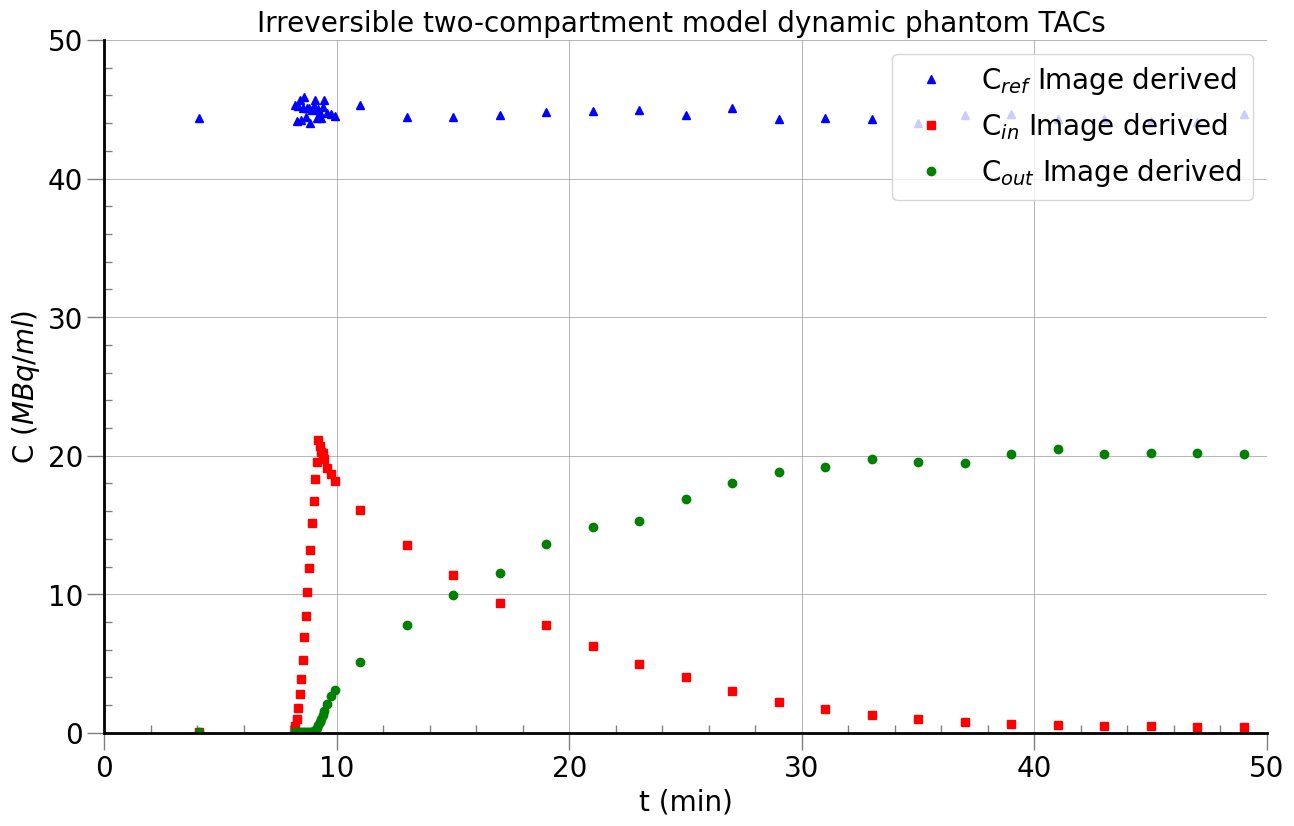

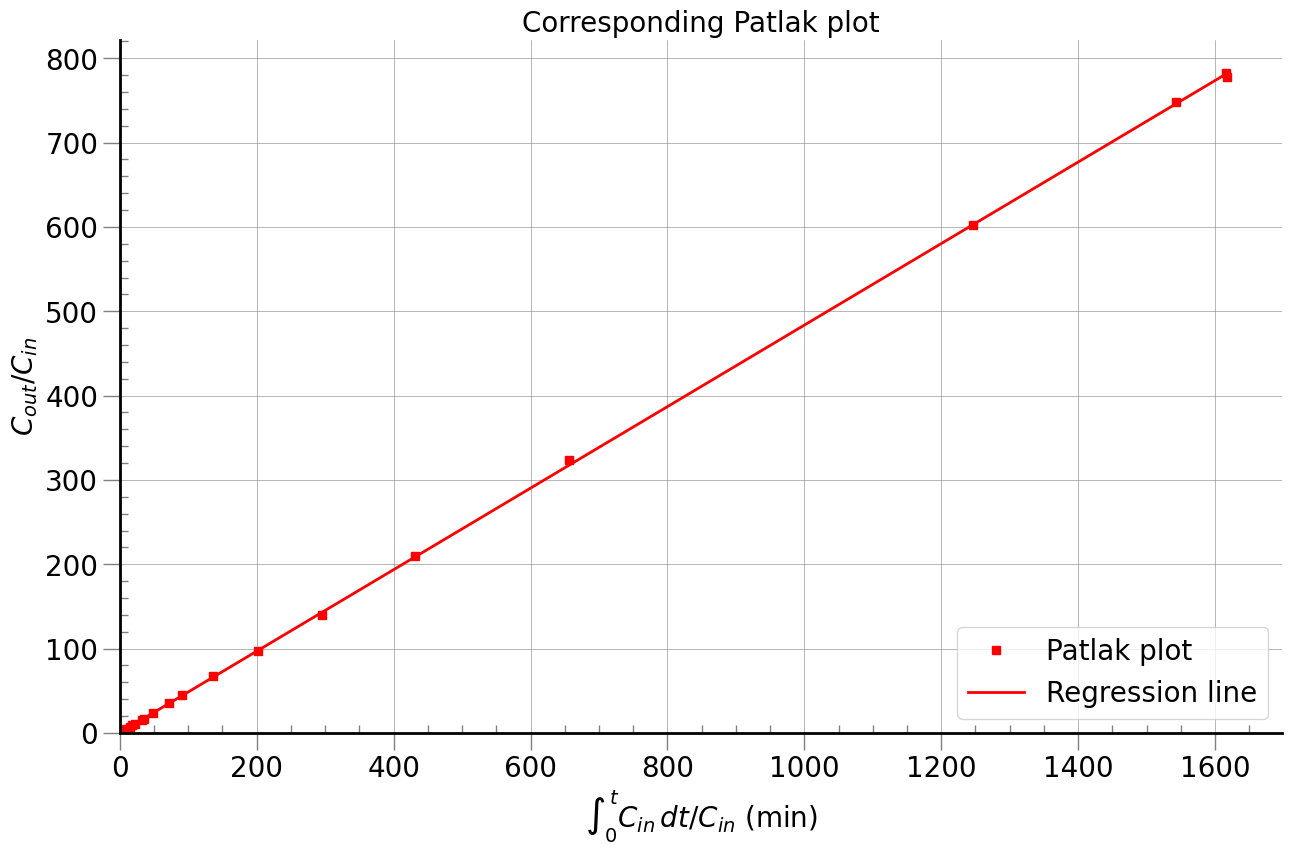

Fit results ko1 0.008056789981317541 s^-1, 0.1868180159687256
Total activity left the input compartment: 4.173016434692 
Activity in the output compartment: 3.9374788625200003 
Image derived trapping (%): 0.9435569986703433 
Activity in the input compartment: 0.082549003068
[0.018468666668915137, 0.1526681330969797, 0.05895425532059719, 0.09736961606848682, 0.32176015355142984, 0.34780307621743395, 0.6666957471953718, 1.8513322527435951, 3.355592357570865, 4.705448954864544, 7.104260878818837, 9.132647191023034, 11.011019320814695, 15.327337187075662, 16.81163904858524, 23.51543688744603, 35.27215108856615, 44.37606252890754, 67.45758554396244, 97.28737139333116, 139.94270825183918, 209.4307857611327, 323.8206207406821, 601.7924165205732, 747.7251751392809, 782.6330620427101, 777.3206955800052]


In [4]:
tpet=tpet1
Cpetin=Cpetin1
Cpetout=Cpetout1
Cpetref=Cpetref1
q=q1
Cref=Cref1


time=125
Vchamber=0.196
Apetin=0.196*Cpetin
ApetoutOG=0.196*Cpetout
#########################################################################################################
Cpetreffit = np.mean(Cpetref)
scaling_factor=Cref/Cpetreffit

t=np.linspace(0,60*time,60*time+1)     #an array with a data point at every 5 seconds fors 6 minut number of elements should be (end/interval)+1

plt.figure(figsize=(15,9))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.linewidth'] = 2


plt.plot(tpet/60,Cpetref,'^',color='blue',markersize=6,label='C$_{ref}$ Image derived')#
plt.plot(tpet/60,Cpetin,'s',color='red',markersize=6,label='C$_{in}$ Image derived')#
plt.plot(tpet/60,Cpetout,'o',color='green',markersize=6,label='C$_{out}$ Image derived')#
#plt.plot(tpet/60,Cpetref1f,'.',color='black',linewidth=2, label='Max FOV')#
#plt.plot(tpet/60,Cpetin1f,'.',linewidth=2,color='black')#
#plt.plot(tpet/60,Cpetout1f,'.',linewidth=2,color='black')#*1.12234903245099

#Input fit
peakdelay=0  #by bins
startin=np.array([tpet[np.argmax(Cpetin)],Cpetin[np.argmax(Cpetin)]])
spline =UnivariateSpline(tpet[1:],Cpetin[1:],k=1, s=0) # straight line between the datapoint
#spline =UnivariateSpline(tpet,Cpetin,k=3, s=2) # just another copy for altering k,s spline parameters
Cpetinfit=spline(t)

        
for i in range(len(Cpetinfit)): #Make Cpetinfit zero before and after the pulse
    if i<tpet[1] or i>tpet[-1]:
        Cpetinfit[i]=0

CleaveinC=leaveinrf(Vchamber,q,Cpetinfit) #Calculating Cleavein (continuous)

#Discretising Cleavein
Cleavein=np.zeros(len(tpet))
for i in range(len(tpet)):
    Cleavein[i]=CleaveinC[tpet[i]]
Cleavein[-1]=CleaveinC[tpet[-1]-1] #So that the last point of Cleavin wouldn't be zero as it would be due to the derivation within the leaving function    
    

#Integral
integralsC=np.zeros(len(CleaveinC))
for i in range(len(CleaveinC)):
    integralsC[i]=sum(CleaveinC[0:i+1])
    
#Discretising integrals
integrals=np.zeros(len(tpet))
for i in range(len(tpet)):
    integrals[i]=integralsC[tpet[i]]

Cpetout=Cpetout-np.full(len(tpet),Cpetout[np.argmax(Cpetin)]) #shifting the output function
for i in range(len(Cpetout)):#Correcting for the already trapped tracer in Cout   
    if Cpetout[i]<0:
        Cpetout[i]=0
            
#Patlak plots
patlaklim=tpet[np.argmax(Cpetin)+0] #2000# gives the lower limit of which data should still be evaluated for the fit. It's given in PatlakX value, however it could be time as well, but I just convert the plot units 
PatlakX=integrals/(Cleavein)  # Ahh this could be continuous, but witouth a continuous fit it is discrete. The analysis can be converted to minutes here as well
PatlakY=Cpetout/Cleavein
PatlakXm=[]    # This is just the PatlakX after the patlaklim segment, also discrete. Used for the line fit. Could be the discretation step, but PatlakX is already discrete
PatlakYm=[]
for i in range(len(tpet)):
    if tpet[i]>patlaklim: # now it is time limited
        PatlakXm.append(PatlakX[i])
        PatlakYm.append(PatlakY[i])

PatlakXm=np.array(PatlakXm)  
PatlakYm=np.array(PatlakYm)

######## Max. FOV for Run1 (Al)
PatlakXm2=np.array([-6.355897606457594, 3.56906519855403, 16.83250758769294, 34.38727602386689, 83.21624834626438, 87.10120304486726, 201.05029022146024, 394.3803781740682, 613.354934814135, 896.5919963747688, 1106.0685577737604, 1387.5766132092724, 1749.1007187418309, 2034.4388903300169, 2988.1572780275756, 3721.099201193314, 5923.804300408298, 7421.190224341836, 13251.61553476434, 16691.74695163888, 25767.295390401963, 48193.155465886804, 69546.00986327838, 77387.90565267306, 77468.80209333918, 77587.80209334676])
PatlakYm2=np.array([-0.01415078939108791, 0.026212807023790922, 0.0923910509807436, 0.20886685239899067, 0.5642465706517588, 0.6121063303750025, 1.5418725555014567, 3.0313859485362267, 4.663095161501049, 6.635875519109285, 8.150711353882304, 10.182070492593482, 12.805900045900591, 14.801216626443082, 21.370811939853283, 26.994944443960037, 41.76588866919642, 52.25396991622806, 93.89037293342817, 118.97787120679716, 181.4715804504253, 343.20633062864687, 487.17639181562134, 537.1926460450574, 552.3313905567163, 549.4554684249487])
res2intercept= 0.3096904101774811
res2slope= 0.007044846953625178

res = linregress(PatlakXm,PatlakYm)        


#Extra:
#Patlak plots for the activity version just for double checking
Apetout=ApetoutOG-np.full(len(tpet),ApetoutOG[np.argmax(Apetin)]) #shifting the output function

integralsA=np.zeros(len(Apetin))
for i in range(len(integralsA)):
    if i>=np.argmax(Apetin):
        integralsA[i]=-(Apetin[i]-Apetin[np.argmax(Apetin)])  #just keeping the negative sign outside the bracket to keep the familiraty with the underlying integral

# perform the fit for the falling edge of the input  
starttime=np.argmax(Cpetin)+0  #add extra delay here
ki2, cv = curve_fit(monoExp2, tpet[starttime:None], Cpetin[starttime:None], (0.2/60))
Cinfitexp=monoExp2(tpet[starttime:None],ki2)
###########################################################################                
###########################################################################
'''First plot (starts earlier)'''
#plt.axhline(np.mean(Cref),linestyle='--', color='blue',label='C$_{ref}$ Dose calibrator')
#plt.plot(t/60,Cpetinfit,'--',color='orange',label='Cin fit')#
#plt.plot(t/60,CleaveinC,'--',color='black',label='CleaveinC')#
#plt.plot(tpet/60,Cleavein,'.',label='Discrete Cleavein')
#plt.plot(tpet[starttime:None]/60,Cinfitexp)

plt.ylim([0, 50]) #[0, 100]
plt.xlim([0, 50]) #[0, 3000]
plt.rcParams["font.family"] = "DejaVu Sans" #"Times New Roman"  
plt.grid(True)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major',labelsize=20, length=12, color='gray')
plt.tick_params(which='minor', length=6, direction='in', color='gray')

plt.xlabel('t (min)',fontsize="20")
plt.ylabel('C $(MBq/ml)$',fontsize="20")
plt.title('Irreversible two-compartment model dynamic phantom TACs ' ,fontsize="20") 
plt.legend(loc='upper right',fontsize="20")
plt.savefig('Two-compartmental irreversible model dynamic phantom time activity curves.png',dpi=800) #.pdf
plt.show()
  
    
#Second plot    
plt.figure(figsize=(15,9))
plt.rcParams["font.family"] = "DejaVu Sans" #"Times New Roman"  
plt.grid(True)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major',labelsize=20, length=12, color='gray')
plt.tick_params(which='minor', length=6, direction='in', color='gray')

'''Need to manual;y refreash Full. FOV values again if the analysis or dataset changes'''
#print(PatlakXm.tolist(),'\n',PatlakYm.tolist(),'\n', res.intercept,'\n',res.slope)
plt.plot(PatlakXm/60,PatlakYm,'s',markersize=6,color='red',label='Patlak plot')
#plt.plot(PatlakXm2,PatlakYm2,'o',markersize=6,color='black',label='Max. FOV') #For Run1
plt.plot(PatlakXm/60, res.intercept + res.slope*PatlakXm, 'r',linewidth=2, label='Regression line')
#plt.plot(PatlakXm, res2intercept + res2slope*PatlakXm,'--', color='black',linewidth=2, label='Max. FOV regression line') #Used Patlak Xm, so that it wouldn't be shorter than the other line, technically it could be just two points as well
#######


plt.ylim([0,None])
plt.xlim([0,None]) #[0,None]
#plt.xlabel(r'$\int_0^t C_{in}\,dt/C_{in}$',fontsize="20")
xlabel = plt.xlabel(r'$\int_0^t C_{in}\,dt/C_{in}$ (min)',fontsize="20")
xlabel.set_position((0.5, 50))
plt.ylabel('$C_{out}/C_{in}$',fontsize="20")
plt.title('Corresponding Patlak plot' ,fontsize="20") 
plt.legend(loc='lower right',fontsize="20")
plt.savefig('Corresponding Patlak plot.png',dpi=800) #
plt.show()

"""
#Third plot for calculating with Activity
plt.figure(figsize=(15,9))
plt.plot(tpet,Apetin)
plt.plot(tpet,Apetout)
plt.plot(tpet,integralsA)
plt.xlim([0,None]) #[0,None]
plt.xlabel('t',fontsize="12")
plt.ylabel('A',fontsize="12")
plt.title('Activity version' ,fontsize="15") 
plt.show()
"""

print('Fit results ko1',res.slope,'s^-1,',res.intercept)
#print('Percentage error from expected k Concentration:', res.slope/(q/(60*Vchamber))-1, 'Activity:',(Apetout[-1]/integralsA[-1])-1)  # Percentage of expected k
#print(ki2)
#print(Cleavein.tolist())
#print(Cpetout.tolist())# shifted to start at zero
#print(tpet.tolist()) # For generating tpet use reversible code


print('Total activity left the input compartment:',integralsA[-1]+ApetoutOG[np.argmax(Apetin)],'\n'
      'Activity in the output compartment:',ApetoutOG[-1],'\n' #It is the non shifted one, because we can assume that the retention in the begining was 100%
     'Image derived trapping (%):',ApetoutOG[-1]/(integralsA[-1]+ApetoutOG[np.argmax(Apetin)]),'\n'
     'Activity in the input compartment:',Apetin[-1]) #It is the non shifted one, because we can assume that the retention in the begining was 100%)

print(PatlakYm.tolist())

### For simulation (Add the sampling from the reversible code to get Cpetin/Cpetout)

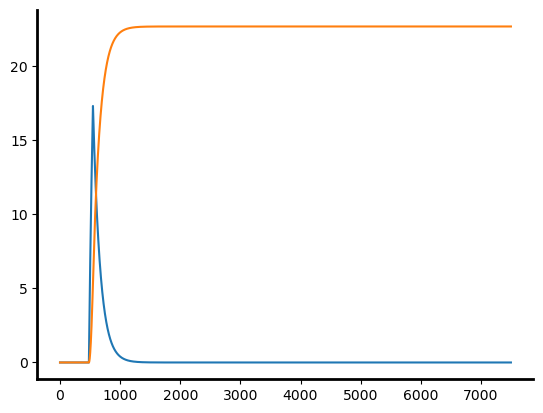

In [3]:
dela=8*60
kk1=0.5/60  #unit is s^-1
kk2=0.5/60  #in vivo k1 and k2 are not equal as a matter of fact the input function doesnt strictly have a k value, but as it is dispersed from a square function
                      #it can be written as a convolution. But here I programmed the input function being defined by a k1 value
Csy=40
t2=dela+68
Vpat=0      #0.3  #The reversible volume in the patlak model.

Cin=Analytic_conv(Csy,dela,t2,kk1,kk2)
#startin=np.array([t[np.argmax(Cin)],Cin[np.argmax(Cin)]])
#Cleavein=leaveinrf(Vchamber,q,Cin)
Cout,integrals=Retention(Cin,kk2,Vpat,0) #or possibly with Cleavein if the k1!=k2

plt.plot(t,Cin)
plt.plot(t,Cout)